## "Week of Oct21" HW [*due prior to the Nov08 TUT*]

### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create *python* code explicitly demonstrating your explanation using *numpy* and *scipy.stats* <br>


A simple linear regression is a model used to describe two variables that are lineraly dependent on each other. It can be represented as an equation: <br>
    <center> Y = $\beta$$_0$ + $\beta$$_1$X + $\epsilon$ </center>
- Here the variable Y refers to the dependent or outcome variable which is the variable being measured with every test. The aim of the is to predict the nature of the dependent variable.
- The variable X refers to the independent or predictor variable, which is the variable within the control of the experimenter. This value is varied to measure the value of Y at different values of X to show linear correlation between the variables. In a Simple Linear Regression model, there's only one independent variable.
- $\beta$$_0$ is the intercept, representing the value of Y when X equals zero. On a graph, this shows the point where the regression line crosses the Y axis.
- $\beta$$_1$ is the slope, representing the rate of change of outcome variable with respect to the predictor variable. Positive $\beta$$_1$ implies positive correlation, while negative $\beta$$_1$ implies negative correlation.
- $\epsilon$ is the error term, it represents the margin of error in the experiment or data collection that is not captured by the fitted distribution, so the error is included as difference between the observed value and predicted value. $\epsilon$ is assumed to be normally distributed with a mean of zero and a fixed standard deviation, displaying randomness of the error.

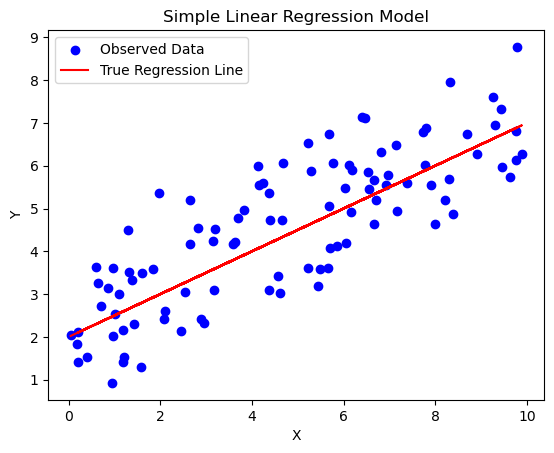

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parameters
np.random.seed(0)  # For reproducibility
beta_0 = 2         # Intercept
beta_1 = 0.5       # Slope
sigma = 1          # Standard deviation of the error term

# Generate random predictor values (X)
n = 100                      # Number of data points
X = np.random.uniform(0, 10, n)

# Generate the error term (epsilon) from a normal distribution
epsilon = norm.rvs(loc=0, scale=sigma, size=n)

# Calculate the outcome variable (Y)
Y = beta_0 + beta_1 * X + epsilon

# Plot the simulated data
plt.scatter(X, Y, color='blue', label='Observed Data')
plt.plot(X, beta_0 + beta_1 * X, color='red', label='True Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Simple Linear Regression Model')
plt.show()


### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using *pandas* and *import statsmodels.formula.api as smf*<br>


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Set random seed for reproducibility
np.random.seed(0)

# Parameters for the linear model
beta_0 = 2      # Intercept
beta_1 = 0.5    # Slope
sigma = 1       # Standard deviation of the error term

# Generate predictor variable X
n = 100  # Number of observations
X = np.random.uniform(0, 10, n)

# Generate error term
epsilon = np.random.normal(0, sigma, n)

# Calculate the outcome variable Y
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame to store the data
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the linear regression model
model = smf.ols('Y ~ X', data=data).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     200.0
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           2.09e-25
Time:                        01:39:10   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2222      0.193     11.496      0.0

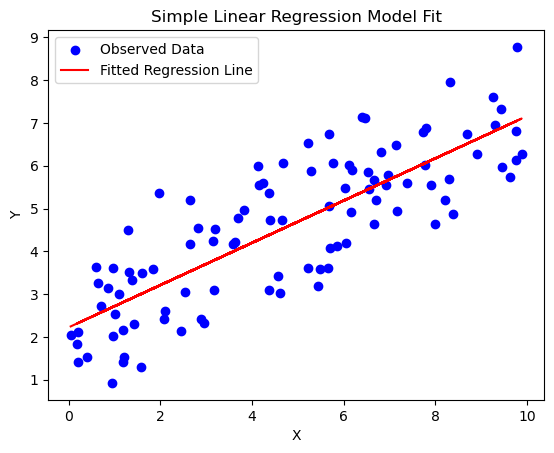

In [14]:
# Predict Y values using the fitted model
data['Y_pred'] = model.predict(data['X'])

# Plot the observed data points
plt.scatter(data['X'], data['Y'], color='blue', label='Observed Data')

# Plot the regression line
plt.plot(data['X'], data['Y_pred'], color='red', label='Fitted Regression Line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Simple Linear Regression Model Fit')
plt.show()

### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; *but, hint though: simulation of random sampling variation*<br>


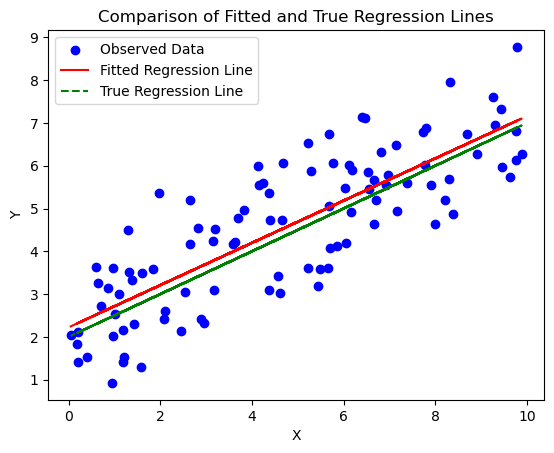

In [4]:
# Plot the observed data points
plt.scatter(data['X'], data['Y'], color='blue', label='Observed Data')

# Plot the fitted regression line (from statsmodels)
plt.plot(data['X'], data['Y_pred'], color='red', label='Fitted Regression Line')

# Plot the true line (from the theoretical model)
plt.plot(data['X'], beta_0 + beta_1 * data['X'], color='green', linestyle='--', label='True Regression Line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Comparison of Fitted and True Regression Lines')
plt.show()


The true regression line above shows true distribution of the data based on the theoretical relationship between X and Y, when $\beta$$_1$=2 and $\beta$$_1$=0.5. This model reflects the actual distribution of data in a world with no error margins. This means that the assumption is that there is an infinite number of samples and there is no random variation within the samples, so the graph formed is a perfect fit.
The fitted regression is formed from the collected sample data, using a method called Ordinary Least Square (OLS) regression. This shows a graph that is formed with all the errors of a sample collected in real life. While this is less representative of the true regression line, it is a reasonable estimate formed from the sample data above.
The comparison between these lines shows us the margin of error in the estimated samples compared to the original population, so this helps us account for the error due to random error in measuring each sample. Since the real values of $\beta$$_1$=2 and $\beta$$_1$=0.5 are unknown in real life situations, reducing the error margin would help gain more accurate estimations of the true model of the population, typically by increasing the sample size for better accuracy.

### Summary

In this session, we covered several key aspects of Simple Linear Regression:

Theoretical Model Explanation: We defined the Simple Linear Regression model with components like the predictor and outcome variables, slope and intercept coefficients, and the error term. We explained how these elements come together to describe a theoretical linear relationship between the variables, producing samples that include random variation.

Data Simulation and Model Fitting: We generated a simulated dataset using known parameters for the theoretical model. Then, we used pandas and statsmodels to fit a regression model to this sample data. We examined the fitted model summary, which provides details like coefficient estimates, p-values, and R-squared.

Visualization of Fitted vs. Theoretical Lines: We created a scatter plot with the fitted regression line and added the true line based on known parameters. This allowed us to visually compare the two, showing the effect of sampling variability on the fitted line.

Importance of Comparing Fitted and Theoretical Lines: We discussed the significance of adding the theoretical line for comparison, as it helps us understand the difference between sample-based estimates and true population values. This adds a layer of insight that goes beyond using trendline='ols' alone.

This session highlighted the process of moving from theory to practice in Simple Linear Regression, demonstrating the differences between theoretical models and sample-based estimates through visualization.

### 4. Explain how *fitted_model.fittedvalues* are derived on the basis of *fitted_model.summary().tables[1]* (or more specifically  *fitted_model.params* or *fitted_model.params.values*)<br>


fitted_model.fittedvalues are a series of values representing the predicted linear regression model based on the sample data collected through a series of different calculations. In this case, fitted_model.params are the estimated values of $\beta$$_0$ and $\beta$$_1$ when the observed sample data is fitted into the distibution. These paramters are then used to compute each individual value of Y acccording to the fitted parameters, using the equation and plugging in each observed value of X. fitted_model.summary().tables[1] is a good way to display the necessary data, as it can display the parameter estimates of fitted_model.params, but also shows standard errors, t values and p values. This helps calcuate the values of fitted_model.fittedvalues and in turn visualize an estimate of the model.

### 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by *trendline='ols'* and *smf.ols(...).fit()*) and why it requires "squares"<br>

The fitted line is chosen for the fitted model based on the observed data using "ordinary least squares" method which applies minimization of the sum of squared "residuals" to find the best fitted line. The "residual" is the difference between the observed value and the calculated value of Y according to the estimated parameters for linear regression. The visualization below shows every residual as a red dotted line and the trendline is selected such that the overall length of all these lines is as small as possible. Squares are used here since squres are all poisitive so they are a good way to make all differences positive, regardless of which side of the fitted model they are on. They also increase the effect of larger residuals, ensuring that the fitted model is close to all points rather than ignoring it in favor of keeping the average small. Lastly, the orange line is the true regression line we are trying to approximate here. The fitted model here provides reasonably close accuracy to the line, despite still varying somewhat due to the randomn variation of samples.

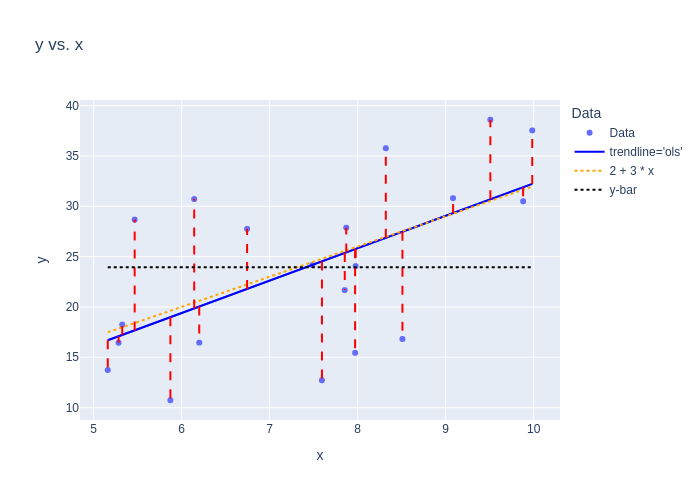

In [8]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': Y})
model_data_specification = smf.ols("y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png") 

### 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. _fitted_model.fittedvalues_)"; and therefore, why _fitted_model.rsquared_ can be interpreted as a measure of the accuracy of the model; and, therefore what the two _np.corrcoef(...)[0,1]\*\*2_ expressions capture in the context of _Simple Linear Regression models_.

1. `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()`
2. `fitted_model.rsquared`
3. `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2`
4. `np.corrcoef(Y,x)[0,1]**2`<br><br>


The first expression above is the formula for $R^2$, which is a measure of how well the model explains the variation in outcome variable Y. The equation ((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum() represents the sum of squares of residuals divided by the sum of squared differences about the mean of observed values $Y_i$. This is the proportion of total variation in Y unexplained by fitted model, and subtracting from 1 gives the proportion of total variation in Y explained by fitted model,  which is $R^2$. This is also returned simply through the fitted_model.rsquared code. The next code is also equivalent to these values, as in Simple Linear Regression the square of the correlation of the correlation between Y and the fitted values of X should be equal to the value of $R^2$. The last code is distinct however, since it measures the correlation between Y and the observed X values, considering X as an independent variable. This considers the amount of variation in X that is explained without considering the linear regression model, and thus can be used with the $R_2$ value to estimate the goodness of the fit of the model.

### 7. Indicate a couple of the assumptions of the *Simple Linear Regression* model specification that do not seem compatible with the example data below<br>


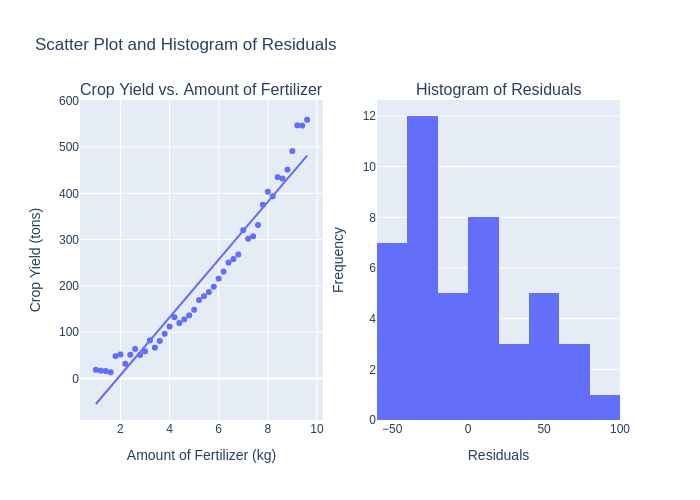

In [9]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

1. The assumption of linearity does not hold since the scatter plot shows an obvious curve in the correlation between Crop Yield and Amount of Fertilizer
2. The assumption of normality in distribution of residuals also doesn't hold, since the histogram shows a distinctly not normal distribution of residuals. 

## Summary of Session on Simple Linear Regression

In this session, we explored various aspects of Simple Linear Regression (SLR) and its assumptions, focusing on the interpretation and analysis of fitted models, residuals, and the proportion of variation explained by the model. Here's a summary of the key points:

1. **Simple Linear Regression (SLR) Explanation**:
   - We discussed the components of the SLR model, including the predictor and outcome variables, the slope and intercept coefficients, and the error term.
   - We explained the interpretation of the "ordinary least squares" (OLS) method for fitting the model and how it minimizes the sum of squared residuals.

2. **Proportion of Variation Explained (R-squared)**:
   - We reviewed how R-squared, as a measure of the model's accuracy, reflects the proportion of variation in the outcome \( Y \) explained by the model. This was illustrated using the formula \( 1 - \frac{\sum (Y_i - \hat{y}_i)^2}{\sum (Y_i - \bar{Y})^2} \) and its connection to \( \text{np.corrcoef}(Y, \hat{Y})^2 \).

3. **Assumptions of the Simple Linear Regression Model**:
   - We discussed the assumptions underlying the SLR model, including the normality of residuals.
   - You provided an example with crop yield data and fertilizer amount. We examined the residuals' histogram and concluded that the assumption of normality of residuals might not hold, based on the shape of the distribution.

4. **Interpretation of Residuals and Model Fit**:
   - The importance of checking residuals' distribution to validate model assumptions was highlighted.
   - We clarified that the histogram of residuals should ideally be approximately normal, and significant deviations from this indicate potential issues with the model or its assumptions.

This session provided insight into the interpretation and testing of Simple Linear Regression models, focusing on model fit, residuals, and diagnostic checks.


## "Week of Nov04" HW [due prior to the Nov08 TUT]

_**In place of the "Data Analysis Assignment" format we introduced for the previous weeks' HW, the remaining questions will be a collection of exercises based around the following data**_

> The details of the "LOWESS Trendline" shown below are not a part of the intended scope of the activities here, but it is included since it is suggestive of the questions we will consider and address here


In [15]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 8. Specify a *null hypothesis* of "no linear association (on average)" in terms of the relevant *parameter* of the *Simple Linear Regression* model, and use the code below to characterize the evidence in the data relative to the *null hypothesis* and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Remember that **Hypothesis Testing** is not a "mathematical proof"_
>
> - _We do not prove $H_0$ false, we instead give evidence against the $H_0$: "We reject the null hypothesis with a p-value of XYZ, meaning we have ABC evidence against the null hypothesis"_
> - _We do not prove $H_0$ is true, we instead do not have evidence to reject $H_0$: "We fail to reject the null hypothesis with a p-value of XYZ"_

|p-value|Evidence|
|-|-|
|$$p > 0.1$$|No evidence against the null hypothesis|
|$$0.1 \ge p > 0.05$$|Weak evidence against the null hypothesis|
|$$0.05 \ge p > 0.01$$|Moderate evidence against the null hypothesis|
|$$0.01 \ge p > 0.001$$|Strong evidence against the null hypothesis|
|$$0.001 \ge p$$|Very strong evidence against the null hypothesis|

</details>    

> ```python
> import seaborn as sns
> import statsmodels.formula.api as smf
>
> # The "Classic" Old Faithful Geyser dataset
> old_faithful = sns.load_dataset('geyser')
> 
> linear_for_specification = 'duration ~ waiting'
> model = smf.ols(linear_for_specification, data=old_faithful)
> fitted_model = model.fit()
> fitted_model.summary()
> ```


### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the *null hypothesis* in the context of short wait times which are less than  *short_wait_limit* values of *62*, *64*, *66*.<br>


In [ ]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 10. Let's now consider just the (*n=160*) long wait times (as specified in the code below), and write code to do the following:

1. create fitted **Simple Linear Regression** models for **boostrap samples** and collect and visualize the **bootstrapped sampling distribution** of the **fitted slope coefficients** of the fitted models;  


2. **simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $Y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficient** under a **null hypothesis** assumption of "no linear association (on average)"; then,  


3. report if $0$ is contained within a 95\% **bootstrapped confidence interval**; and if the **simulated p-value** matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?<br><br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _You'll need to create `for` loops to repeatedly create fitted **Simple Linear Regression** models using different samples, collecting the **fitted slope coeffient** created in each `for` loop "step" in order to visualize the **simulated sampling distributions**_
> 
> - _A **bootstrapped sample** of the "long wait times" dataset can be created with `old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)`_
>
>
> - _A **simulated** version of the "long wait times under a null hypothesis assumption of **no linear association (on average)**" dataset can be created by first creating `old_faithful_simulation = old_faithful[long_wait].copy()` and then assigning the **simulated** it values with `old_faithful_simulation['duration'] = 1.65 + 0*old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())`_ 
>
>  _The values $\beta_0 = 1.65$ and $\sigma = 0.37$ are chosen to match what is actually observed in the data, while $\beta_1 = 0$ is chosen to reflect a **null hypothesis** assumption of "no linear assocaition (on average)"; and, make sure that you understand why it is that_
>
>
> - _if `bootstrapped_slope_coefficients` is the `np.array` of your **bootstrapped slope coefficients** then `np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])` is a 95\% **bootstrapped confidence interval**_
> 
>
> - _if `simulated_slope_coefficients` is the `np.array` of your **fitted slope coefficients** **simulated** under a **null hypothesis** "no linear association (on average)" then `(np.abs(simulated_slope_coefficients) >= smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params[1]).mean()` is the **p-value** for the **simulated** **simulated sampling distribution of the slope coeficients** under a **null hypothesis** "no linear association (on average)"_

</details>
<br>

In [ ]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length<br>

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

### where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications<br>

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

### and report the evidence against a *null hypothesis* of "no difference between groups "on average") for the new *indicator variable* based model<br>


In [ ]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

### 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of *error* terms is normal for each of the models, and explain why the other three do not support this assumption.

> Hint: Question 5 of the *Communication Activity #2* of the Oct25 TUT (addressing an *omitted* section of the TUT) discusses how the assumption in *Simple Linear Regression* that the *error* terms $\epsilon_i \sim \mathcal N\left(0, \sigma\right)$ is diagnostically assessed by evaluating distributional shape of the *residuals* $\text{e}_i = \hat \epsilon_i = Y_i - \hat y_i$


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) *hypothesis test*; but, we can do "two sample" hypothesis testing using a *permuation test*, or create a 95% *bootstrap confidence interval* for the difference in means of the two populations. 

### (A) Do a permuation test $\;H_0: \mu_{\text{short}}=\mu_{\text{long}} \; \text{ no difference in duration between short and long groups}$ by "shuffling" the labels
### (B) Create a 95% bootstrap confidence interval  by repeatedly bootstrapping within each group and applying *np.quantile(bootstrapped_mean_differences, [0.025, 0.975])* to the collection of differences between the sample means.    
### (a) Explain how the sampling approaches work for the two simulations.
### (b) Compare and contrast these two methods with the *indicator variable* based model approach used in Question 11, explaining how they're similar and different.<br>
    
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _You'll need to create `for` loops for repeated (shuffling simulation) **permutation** and (subgroup) **bootstrapping**, where_
>
> - _"shuffling" for **permutation testing** is done like this `old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values)#.groupby('kind').size()`; then, the **mean difference statistic** is then calculated using `.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]` (so the **observed statistic** is `old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]`_
> 
>
> - _"two sample" **bootstrapping** is done like this `old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)#.groupby('kind').size()`; then, the **bootstrapped mean difference statistic** is then calculated using `.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]` (like the **observed statistic** except this is applied to the **bootstrapped** resampling of `old_faithful`)_
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_
</details>

### 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>

Yes

## Recommended Additional Useful Activities [Optional]

The "Ethical Profesionalism Considerations" and "Current Course Project Capability Level" sections below **are not a part of the required homework assignment**; rather, they are regular weekly guides covering (a) relevant considerations regarding professional and ethical conduct, and (b) the analysis steps for the STA130 course project that are feasible at the current stage of the course 

<br>
<details class="details-example"><summary style="color:blue"><u>Ethical Professionalism Considerations</u></summary>

### Ethical Professionalism Considerations
    
The TUT and HW both addressed some of the assumptions used in **Simple Linear Regression**. The **p-values** provided by `statsmodels` via `smf.ols(...).fit()` depend on these assumptions, so if they are not (at least approximately) correct, the **p-values** (and any subsequent claims regarding the "evidience against" the **null hypothesis**) are not reliable. In light of this consideration, describe how you could diagnostically check the first three assumptions (given below) when using analyses based on **Simple Linear regression** model. From an Ethical and Professional perspective, do you think doing diagnostic checks on the assumptions of a **Simple Linear regression** model is something you can and should do whenever you're doing this kind of analysis? 
            
> The first three assumptions associated with the **Simple Linear regression** model are that
> 
> - the $\epsilon_i$ **errors** (sometimes referred to as the **noise**) are **normally distributed**
> - the $\epsilon_i$ **errors** are **homoscedastic** (so their distributional variance $\sigma^2$ does not change as a function of $x_i$)
> - the linear form is [at least reasonably approximately] "true" (in the sense that the above two remain [at least reasonably approximately] "true") so that then behavior of the $Y_i$ **outcomes** are represented/determined on average by the **linear equation**)<br>
> 
>    and there are additional assumptions; but, a deeper reflection on these is "beyond the scope" of STA130; nonetheless, they are that<br><br>
> - the $x_i$ **predictor variable** is **measured without error**
> - and the $\epsilon_i$ **errors** are **statistically independent** (so their values do not depend on each other)
> - and the $\epsilon_i$ **errors** are **unbiased** relative to the **expected value** of **outcome** $E[Y_i|x_i]=\beta_0 + \beta_1x_i$ (which is equivalently stated by saying that the mean of the **error distribution** is $0$, or again equivalently, that the **expected value** of the **errors** $E[\epsilon_i] = 0$)
    
</details>

<details class="details-example"><summary style="color:blue"><u>Current Course Project Capability Level</u></summary>

**Remember to abide by the [data use agreement](https://static1.squarespace.com/static/60283c2e174c122f8ebe0f39/t/6239c284d610f76fed5a2e69/1647952517436/Data+Use+Agreement+for+the+Canadian+Social+Connection+Survey.pdf) at all times.**

Information about the course project is available on the course github repo [here](https://github.com/pointOfive/stat130chat130/tree/main/CP), including a draft [course project specfication](https://github.com/pointOfive/stat130chat130/blob/main/CP/STA130F23_course_project_specification.ipynb) (subject to change). 
- The Week 01 HW introduced [STA130F24_CourseProject.ipynb](https://github.com/pointOfive/stat130chat130/blob/main/CP/STA130F24_CourseProject.ipynb), and the [available variables](https://drive.google.com/file/d/1ISVymGn-WR1lcRs4psIym2N3or5onNBi/view). 
- Please do not download the [data](https://drive.google.com/file/d/1mbUQlMTrNYA7Ly5eImVRBn16Ehy9Lggo/view) accessible at the bottom of the [CSCS](https://casch.org/cscs) webpage (or the course github repo) multiple times.
    
> ### NEW DEVELOPMENT<br>New Abilities Achieved and New Levels Unlocked!!!    
> **As noted, the Week 01 HW introduced the [STA130F24_CourseProject.ipynb](https://github.com/pointOfive/stat130chat130/blob/main/CP/STA130F24_CourseProject.ipynb) notebook.** _And there it instructed students to explore the notebook through the first 16 cells of the notebook._ The following cell in that notebook (there marked as "run cell 17") is preceded by an introductory section titled, "**Now for some comparisons...**", _**and all material from that point on provides an example to allow you to start applying what you're learning about Hypothesis Testing to the CSCS data**_ **using a paired samples ("one sample") framework.**
>
> **NOW, HOWEVER, YOU CAN DO MORE.** 
> - _**Now you can do "two sample" hypothesis testing without the need for paired samples.**_ All you need are two groups.
> - _**And now you can do simple linear regression modeling.**_ All you need are two columns.

### Current Course Project Capability Level

At this point in the course you should be able to do a **Simple Linear Regression** analysis for data from the Canadian Social Connection Survey data
    
1. Create and test a **null hypothesis** of no linear association "on average" for a couple of columns of interest in the Canadian Social Connection Survey data using **Simple Linear Regression**

2. Use the **residuals** of a fitted **Simple Linear Regression** model to diagnostically assess some of the assumptions of the analysis

3. Use an **indicator variable** based **Simple Linear Regression** model to compare two groups from the Canadian Social Connection Survey data

4. Compare and contrast the results of an **indicator variable** based **Simple Linear Regression** model to analyses based on a **permutation test** and a **bootstrapped confidence interval**   
    
</details>    